# 목적에 맞게 데이터 수정하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mticker

In [3]:
total = pd.read_csv("C:/Users/김지희/DSL/dataset/channel_total.csv",  lineterminator='\n') # 인기동영상에 오른 채널들에 대한 정보를 추가로 크롤링한 자료 (채널당 최대 90개의 영상을 크롤링)
trend = pd.read_csv("C:/Users/김지희/DSL/dataset/youtube_nodouble.csv", lineterminator='\n') # 2020.7 ~ 2022.8까지의 인기동영상 목록


# 인기동영상 dataset에서 부족했던 정보들을 total dataset과의 merge를 통해 추가함
trend_total = pd.merge(trend, total[['video_id', 'minute_time', 'open', 'totalview', 'subscriber']], left_on="video_id", right_on = 'video_id', how='left')

In [8]:
# open과 trending_date를 datetime으로 만들기
trend_total['open'] = pd.to_datetime(trend_total['open'])
trend_total['trending_date'] = pd.to_datetime(trend_total['trending_date'])

In [11]:
# 분석에 필요할 정보라고 생각이 들어 새로운 열로 만들어줌
trend_total['time_diff'] = (trend_total['trending_date']-trend_total['open']).dt.days

In [173]:
# time_diff가 365일 이내인 인기동영상 목록을 newbie로 저장함 
newbie = trend_total[trend_total['time_diff']<= 365]

# newbie의 index를 초기화하기
newbie.reset_index(drop=True, inplace=True)

# newbie의 첫번째 열이 의미가 없어보여서 제거하기
newbie.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
# newbie에 속한 채널당 하나의 영상만을 추출하도록 해서 채널에 대해 unique한 dataframe 만들기
df = pd.DataFrame(columns=['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'category_name', 'tag_num', 'minute_time', 'open', 'totalview',
       'subscriber', 'time_diff'])

for i in range(len(newbie['channelId'].unique())):
    df = df.append(newbie[newbie['channelId']==newbie['channelId'].unique()[i]].head(1), ignore_index=True)


# 이제 분석을 시작하자

In [22]:
# 한글 글꼴 가져오기 (나눔바른고딕)
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           241 non-null    object        
 1   title              241 non-null    object        
 2   publishedAt        241 non-null    object        
 3   channelId          241 non-null    object        
 4   channelTitle       241 non-null    object        
 5   trending_date      241 non-null    datetime64[ns]
 6   tags               241 non-null    object        
 7   view_count         241 non-null    object        
 8   likes              241 non-null    object        
 9   dislikes           241 non-null    object        
 10  comment_count      241 non-null    object        
 11  comments_disabled  241 non-null    object        
 12  ratings_disabled   241 non-null    object        
 13  description        233 non-null    object        
 14  category_n

이 데이터셋은 2020.08 ~ 2022.07 기간에서 채널을 생성한지 1년 이내인 신생 유튜버가 처음으로 트렌드 영상에 올라갔을 때의 영상들만 대상으로 선정했다.

이 데이터로 할 수 있는 분석
- 

# 일변량 분석

## 카테고리 분포

In [25]:
cat = df.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

기존 인기동영상 전체 채널로 분석할 때와 달리 People & Blogs가 1등으로 올라왔고, film & animation의 순위도 많이 올라왔다.

Text(0.5, 1.0, '신생채널들의 카테고리 분포 (2020.08~2022.07)')

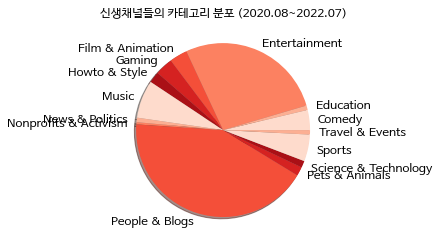

In [201]:
# 카테고리 분포, 파이그래프
sns.set_palette(sns.color_palette("Reds"))
plt.pie(cat['ratio'],
        labels = cat['category_name'],
        startangle = 0,
        textprops = {'fontsize':12},
        shadow = True)
plt.title('신생채널들의 카테고리 분포 (2020.08~2022.07)')

People & Blog 의 비율이 42.3 %로 확실히 다른 카테고리에 비해 비율이 높은 것을 확인할 수 있다. 기존 전체 트렌드 데이터셋의 경우 Entertainment가 People % Blog에 비해 비율이 높았던 것에 비해 다른 경향이 보인다. 

In [27]:
# newbie 중 People & Blogs 에 속한 채널에 뭐가 있는지 확인해보자
df['channelTitle'][df['category_name']=='People & Blogs'].head(20)

0             라떼월드 Latte World
4           집에서안나와 - with ANNA
7             케이밥스타 [K-밥 STAR]
9              호연지기 HOYEONJIGI
12                       영웅대백과
13                    양사랑 coco
14                       하희라이트
21                      부캐선발대회
23              Umaizing 엄정화tv
24                       띵스튜디오
25                      논리왕 전기
29                         슬리퍼
31                   개인사업자 임성빈
36                         안소희
37    Yoona's So Wonderful Day
39                 라포엠 LA POEM
40                         미란이
43                   은또 Euntto
44            Sumi Jo Official
45                 미지우 MEJIWOO
Name: channelTitle, dtype: object

## 숫자형 변수의 분포 확인하기

### 분석 전 데이터 전처리하기

In [28]:
df = df.astype({'view_count': 'int', 'likes':'int', 'dislikes':'int', 'comment_count':'int', 'tag_num':'int'})

In [29]:
# 요약통계량을 확인해보자
df.describe()

,view_count,likes,dislikes,comment_count,tag_num,minute_time,totalview,subscriber,time_diff
count,2.410000e+02,2.410000e+02,241.000000,241.000000,241.000000,215.000000,2.410000e+02,2.260000e+02,241.000000
mean,4.962560e+05,3.610985e+04,153.244813,3628.726141,15.601660,10.808760,5.941833e+07,3.489346e+05,150.033195
std,9.377449e+05,1.431002e+05,790.741289,15647.218929,18.432733,8.409904,9.305521e+07,7.010436e+05,112.234534
min,2.373300e+04,0.000000e+00,0.000000,23.000000,0.000000,0.133333,3.228620e+05,2.560000e+03,1.000000
25%,1.188940e+05,3.332000e+03,0.000000,402.000000,0.000000,3.908333,9.367207e+06,5.795000e+04,45.000000
50%,2.207400e+05,7.180000e+03,39.000000,824.000000,10.000000,9.650000,2.302829e+07,1.675000e+05,137.000000
75%,4.043550e+05,1.745700e+04,116.000000,1927.000000,22.000000,14.783333,7.198328e+07,3.465000e+05,241.000000
max,7.984160e+06,1.613136e+06,11828.000000,212614.000000,95.000000,50.833333,6.225524e+08,8.470000e+06,365.000000


### 조회수 분포

In [85]:
print(np.percentile(df['view_count'],100))
print(np.percentile(df['view_count'],95))


7984160.0
1955628.0


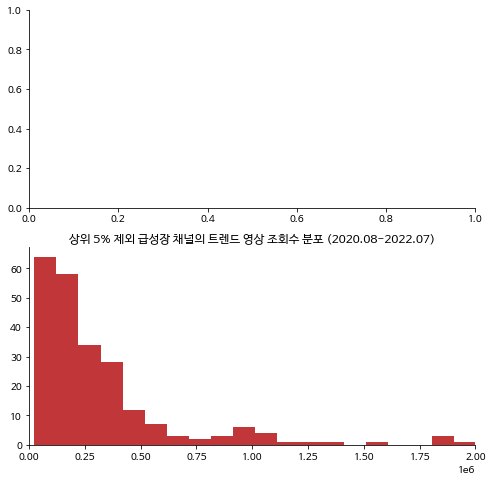

In [116]:
f, axes = plt.subplots(2)

f.set_size_inches((8, 8))
# f.suptitle('조회수 분포 확인', fontsize = 15)
# axes[0].hist(data = df, x='view_count', bins=40)
# axes[0].set_title('급성장 채널의 트렌드 영상 조회수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(data = df[df['view_count']<3000000], x='view_count', bins=30)
axes[1].set_title('상위 5% 제외 급성장 채널의 트렌드 영상 조회수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,2000000])
plt.show()

In [109]:
# 조회수가 600만 이상인 채널 보기
df['channelTitle'][df['view_count']>3000000]

52           Jennierubyjane Official
108                김종국 GYM JONG KOOK
185           7FATES: CHAKHO by HYBE
207    냠냠엔터테인먼트 YAMYAM ENTERTAINMENT
234                           Kep1er
Name: channelTitle, dtype: object

연예인 채널이 많다...

### 신생 채널 구독자수 분포

(0.0, 3000000.0)

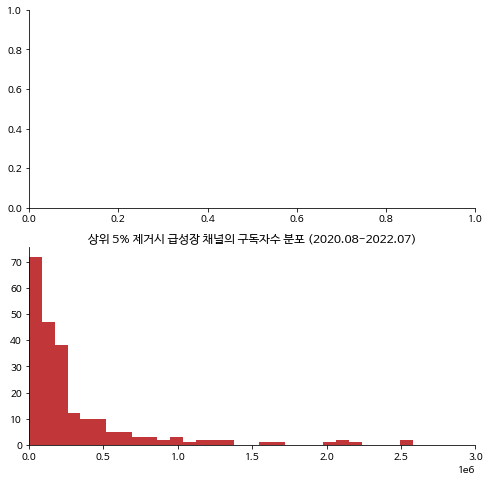

In [162]:
f, axes = plt.subplots(2)
f.set_size_inches((8, 8))
# f.suptitle('구독자수 확인', fontsize = 15)
# axes[0].hist(data = df, x='subscriber', bins = 40)
# axes[0].set_title('신생 채널 전체 조회수 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
sns.set_palette(sns.color_palette("RdGy"))
sns.despine()
axes[1].hist(df['subscriber'][df['subscriber']<3000000], bins = 30)
axes[1].set_title('상위 5% 제거시 급성장 채널의 구독자수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1].set_xlim([0,3000000])

In [172]:
# 구독자수가 20만명 이상인 채널 보기
df['channelTitle'][df['category_name']=='People & Blogs'][df['subscriber']>200000]

4            집에서안나와 - with ANNA
7              케이밥스타 [K-밥 STAR]
25                       논리왕 전기
36                          안소희
37     Yoona's So Wonderful Day
40                          미란이
45                  미지우 MEJIWOO
47                leeminho film
51     검은고양이 다홍 Blackcat Dahong
52      Jennierubyjane Official
62                        보개미TV
70                    살빼조DietJo
71                   임영웅 Shorts
86                         도장TV
87                        Pixid
95                          승상싱
96                      혀니콤보 TV
99                천뚱 1000ddoong
103       집나간햄지 Wandering Hamzy
104                        햇도시락
106                       소비더머니
114                       휴먼스토리
119          지켜츄 Chuu Can Do It
123           내주제에 Dare U Naeju
128                         강혜원
129                         너덜트
134                     조씨Jossi
138                        웃음박재
141                    동네친구 강나미
144                     차린건 없지만
152                     먹보스 쭈엽이
160     